In [ ]:
'''Prerequisites

  1.Add the  dataset .csv files on the google drive as it will be mounted in the notebook'''

In [ ]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.python.framework import ops
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
X_data = pd.read_csv("/content/drive/My Drive/Total_input_data_shuffle(X).csv")
Y_data = pd.read_csv("/content/drive/My Drive/Total_output_data_shuffle(Y).csv")

In [ ]:
print("shape of input: {}".format(X_data.shape))
X_data.head()

shape of input: (12288, 660)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659
0,1.0,0.0,1.0,0.129412,0.082353,0.070588,0.023529,1.0,0.733333,0.580392,0.509804,1.0,0.227451,0.219608,0.760784,0.050980,0.074510,1.0,1.00000,0.152941,1.0,0.549020,0.823529,0.403922,1.0,0.329412,1.0,1.0,0.137255,0.423529,1.0,0.984314,0.0,0.576471,0.019608,0.141176,0.752941,0.231373,1.0,0.0,...,0.964706,0.356863,0.0,0.568627,0.0,0.109804,0.003922,0.039216,0.733333,1.0,1.0,0.219608,0.0,0.039216,1.0,0.039216,0.611765,0.196078,0.713725,1.0,0.490196,0.227451,0.0,0.364706,0.407843,0.439216,0.415686,0.078431,0.345098,0.0,0.474510,0.003922,0.0,0.235294,0.000000,0.215686,0.239216,0.098039,0.043137,0.278431
1,1.0,0.0,1.0,0.109804,0.137255,0.070588,0.035294,1.0,0.792157,0.592157,0.505882,1.0,0.145098,0.227451,0.745098,0.078431,0.074510,1.0,1.00000,0.152941,1.0,0.568627,0.815686,0.474510,1.0,0.321569,1.0,1.0,0.168627,0.388235,1.0,1.000000,0.0,0.203922,0.023529,0.101961,0.792157,0.317647,1.0,0.0,...,0.878431,0.270588,0.0,0.600000,0.0,0.141176,0.376471,0.019608,0.549020,1.0,1.0,0.219608,0.0,0.015686,1.0,0.031373,0.788235,0.262745,0.611765,1.0,0.482353,0.207843,0.0,0.470588,0.396078,0.470588,0.431373,0.074510,0.333333,0.0,0.482353,0.466667,0.0,0.207843,0.000000,0.203922,0.254902,0.062745,0.027451,0.290196
2,1.0,0.0,1.0,0.094118,0.176471,0.039216,0.043137,1.0,0.913725,0.564706,0.458824,1.0,0.062745,0.145098,0.639216,0.117647,0.074510,1.0,1.00000,0.145098,1.0,0.552941,0.866667,0.231373,1.0,0.341176,1.0,1.0,0.180392,0.337255,1.0,1.000000,0.0,0.901961,0.000000,0.098039,0.796078,0.470588,1.0,0.0,...,0.725490,0.109804,0.0,0.596078,0.0,0.090196,0.596078,0.035294,0.325490,1.0,1.0,0.211765,0.0,0.015686,1.0,0.035294,0.901961,0.850980,0.254902,1.0,0.188235,0.168627,0.0,0.537255,0.329412,0.270588,0.427451,0.066667,0.274510,0.0,0.462745,0.843137,0.0,0.215686,0.000000,0.188235,0.231373,0.035294,0.031373,0.262745
3,1.0,0.0,1.0,0.078431,0.062745,0.078431,0.031373,1.0,0.733333,0.576471,0.525490,1.0,0.203922,0.176471,0.764706,0.364706,0.066667,1.0,0.65098,0.376471,1.0,0.560784,0.847059,0.407843,1.0,0.019608,1.0,1.0,0.156863,0.443137,1.0,0.972549,0.0,0.576471,0.015686,0.141176,0.760784,0.243137,1.0,0.0,...,0.952941,0.294118,0.0,0.250980,0.0,0.227451,0.003922,0.039216,0.701961,1.0,1.0,0.219608,0.0,0.070588,1.0,0.047059,0.650980,0.239216,0.980392,1.0,0.537255,0.203922,1.0,0.450980,0.082353,0.545098,0.380392,0.090196,0.372549,0.0,0.482353,0.003922,0.0,0.231373,0.890196,0.203922,0.200000,0.098039,0.043137,0.239216
4,1.0,0.0,1.0,0.062745,0.082353,0.078431,0.035294,1.0,0.792157,0.596078,0.541176,1.0,0.172549,0.203922,0.745098,0.172549,0.074510,1.0,0.65098,0.325490,1.0,0.580392,0.854902,0.490196,1.0,0.023529,1.0,1.0,0.188235,0.411765,1.0,1.000000,0.0,0.203922,0.011765,0.101961,0.792157,0.325490,1.0,0.0,...,0.866667,0.262745,0.0,0.262745,0.0,0.196078,0.376471,0.023529,0.521569,1.0,1.0,0.227451,0.0,0.035294,1.0,0.039216,0.835294,0.333333,0.980392,1.0,0.537255,0.196078,1.0,0.560784,0.117647,0.556863,0.403922,0.082353,0.360784,0.0,0.494118,0.466667,0.0,0.200000,0.890196,0.200000,0.196078,0.062745,0.027451,0.258824


In [ ]:
Y_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659
0,0,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,1,0,0,...,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,1,1,1,1,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1
1,1,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,1,...,0,1,1,0,1,0,1,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,1,1,1,0,0


In [ ]:
X_data = np.array(X_data)
Y_data = np.array(Y_data)
print("{}----{}".format(X_data.shape,Y_data.shape))

(12288, 660)----(2, 660)


In [ ]:
'''parameters are
X = X_data
Y = Y_data
bsize = size of minibatch'''

def random_mini_batch(X,Y,bsize):  
  assert X.shape[1] == Y.shape[1]       
  m = Y.shape[1]

  perm = list(np.random.permutation(m))

  X_shuff = X[:,perm]
  Y_shuff = Y[:,perm].reshape((2,m))

  min_batch_list = []

  for i in range(0,m-bsize+1 , bsize):  
    min_batch_list.append( ((X_shuff[:,i:i+bsize]),(Y_shuff[:,i:i+bsize])) )

  if m%bsize:
    min_batch_list.append(((X_shuff[:,m-bsize+2:]),(Y_shuff[:,m-bsize+2:])))

  return min_batch_list

In [ ]:
def create_placeholders(n_x, n_y):

    X = tf.compat.v1.placeholder(tf.float32, shape=(n_x, None), name = "X")
    Y = tf.compat.v1.placeholder(tf.float32, shape=(n_y, None), name = "Y")
    
    return X, Y

In [ ]:
def initialize_parameters():

    tf.random.set_seed(1)        

    initializer = tf.initializers.GlorotNormal(seed=1)
    initializer2 = tf.zeros_initializer()

    W1 = tf.Variable(initializer([25,12288],dtype=tf.float32),name="W1")
    b1 = tf.Variable(initializer2([25,1],dtype=tf.float32),name="b1")

    W2 = tf.Variable(initializer([12, 25],dtype=tf.float32),name="W2")
    b2 = tf.Variable(initializer2([12,1],dtype=tf.float32),name="b2")

    W3 = tf.Variable(initializer([2, 12],dtype=tf.float32),name="W3")
    b3 = tf.Variable(initializer2([2,1],dtype=tf.float32),name="b3")


    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [ ]:
with tf.compat.v1.Session()  as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))
    print("W3 = " + str(parameters["W3"]))
    print("b3 = " + str(parameters["b3"]))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32>
W3 = <tf.Variable 'W3:0' shape=(2, 12) dtype=float32>
b3 = <tf.Variable 'b3:0' shape=(2, 1) dtype=float32>


In [ ]:
def forward_propagation(X, parameters):
    """ LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX"""
    
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    Z1 = tf.add(tf.matmul(W1, X), b1)                      
    A1 = tf.nn.relu(Z1)                                   
    Z2 = tf.add(tf.matmul(W2, A1), b2)                    
    A2 = tf.nn.relu(Z2)                                    
    Z3 = tf.add(tf.matmul(W3, A2), b3)                     

    return Z3

In [ ]:
with tf.compat.v1.Session() as sess:
    X, Y = create_placeholders(12288, 2)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print("Z3 = " + str(Z3))

Z3 = Tensor("Add_2:0", shape=(2, None), dtype=float32)


In [ ]:
def compute_cost(Z3, Y):

    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    
    return cost

In [ ]:
def model(X_data, Y_data,  learning_rate = 0.0001, num_epochs = 1500, minibatch_size = 32, print_cost = True):

    '''n_x --> No. of rows in X_data    (in our case n_x = 64x64x3)
       n_y --> No. of rows in Y_data    (in our case n_y = 2)
       m   --> No. of examples          (in our case m = 660)
    '''

    ops.reset_default_graph()                         
    tf.random.set_seed(1)                             
    seed = 3 

    tf.compat.v1.disable_eager_execution()
                                                             
    (n_x, m) = X_data.shape                          
    n_y = Y_data.shape[0]                           
    global costs                                      
    
    
    #placeholders 


    X, Y = create_placeholders(n_x, n_y)       

    parameters = initialize_parameters()


    #the following two lines get stored in tenserflow graph and when the session runs these lines get executed.
    Z3 = forward_propagation(X, parameters)
    cost = compute_cost(Z3, Y)  


    optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate = learning_rate).minimize(cost)   #or we can use GradientDescentOptimizer()
    
    init = tf.compat.v1.global_variables_initializer()


    with tf.compat.v1.Session() as sess:
        
        sess.run(init)
      
        for epoch in range(num_epochs):

            epoch_cost = 0.                            #Defines a cost related to an epoch
            num_minibatches = int(m / minibatch_size)  #number of minibatches of size minibatch_size in the train set
            seed = seed + 1
            minibatches = random_mini_batch(X_data, Y_data, minibatch_size)

            for minibatch in minibatches:

                (minibatch_X, minibatch_Y) = minibatch
                          
                _ , minibatch_cost = sess.run([optimizer, cost], feed_dict={X: minibatch_X, Y: minibatch_Y})
                             
                epoch_cost += minibatch_cost / num_minibatches

           
            if print_cost == True and epoch % 100 == 0:
                print ("Cost after epoch %i: %f" % (epoch, epoch_cost))

            if print_cost == True and epoch % 5 == 0:
                costs.append(epoch_cost)

        parameters = sess.run(parameters)
        # Calculate the correct predictions
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # Calculate accuracy on the test set
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

        print ("Train Accuracy:", accuracy.eval({X: X_data, Y: Y_data}))
          
        
        return parameters

In [ ]:
costs = []
trained_param = model(X_data,Y_data,0.001,1500,128)

Cost after epoch 0: 1.070055
Cost after epoch 100: 0.004174
Cost after epoch 200: 0.000821
Cost after epoch 300: 0.000366
Cost after epoch 400: 0.000149
Cost after epoch 500: 0.000077
Cost after epoch 600: 0.000048
Cost after epoch 700: 0.000029
Cost after epoch 800: 0.000019
Cost after epoch 900: 0.000016
Cost after epoch 1000: 0.000011
Cost after epoch 1100: 0.000006
Cost after epoch 1200: 0.000004
Cost after epoch 1300: 0.000004
Cost after epoch 1400: 0.000002
Train Accuracy: 1.0


In [ ]:
trained_param["W1"].shape

(25, 12288)

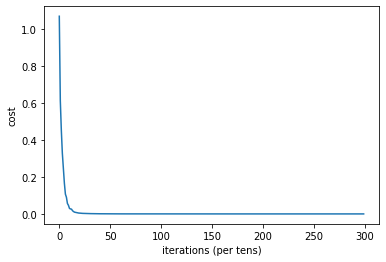

In [ ]:
plt.plot(np.squeeze(costs))
plt.ylabel('cost')
plt.xlabel('iterations (per tens)')
plt.show()

In [ ]:
def predict(img,params):
  cvt = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
  rimg = cv2.resize(cvt,(64,64))
  img_np_arr = np.array(rimg,dtype="float32")
  img_flat = img_np_arr.reshape(12288,1)
  img_norm = img_flat/255
  assert img_norm.shape == (12288,1)
  predVal = forward_propagation(img_norm,params)
  return predVal

In [ ]:
img = cv2.imread("/content/sample_data/ZZZZZZZZK.jpg")

with tf.compat.v1.Session() as sess:
  predVal = np.squeeze(sess.run(predict(img,trained_param)))
  print(predVal)
  if predVal[0]>predVal[1]:
    print("not notes")
  else:
    print("Notes")

[-17.339302   5.117368]
Notes


In [ ]:
type(trained_param)

dict

In [ ]:
np.save('/content/sample_data/trained_params.npy',trained_param)

In [ ]:
data2=np.load('/content/sample_data/trained_params.npy',allow_pickle=True)


In [ ]:
data2[()]['b1'].shape        #access each parameter like this

(25, 1)

In [ ]:
trained_param["b1"].shape

(25, 1)

In [ ]:
np.equal(data2[()]['W1'],trained_param["W1"])

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])